# Max Entropy Process and cascade vulneration

## Setup environment

In [ ]:
#networkx para teoría de grafos, matplot para gráficar y random para generar números aleatorios
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp 
from scipy import stats as st

## Create grid with probabilities from a know distribution

In [ ]:
def cumm_probabilities(n, dx, distribution = st.pareto.cdf):
  x = []
  P = []
  for i in range(n):
    equis = 1 + dx*i
    x.append(equis)
    pes = st.pareto.cdf(x[i],1.4) 
    P.append(pes)
  return P, x

In [ ]:
n = 100
dx = 20/n
P, x = cumm_probabilities(n, dx)
print(P)
print(x)

[0.0, 0.22527734602095306, 0.37566058941609226, 0.48211655979062706, 0.5608443315223497, 0.6210708583724005, 0.6684047911838127, 0.706435009728264, 0.7375555984592774, 0.7634196030631584, 0.7852019950075819, 0.803758872538314, 0.8197274856310858, 0.8335911195028693, 0.8457223678378163, 0.8564127056253706, 0.8658931401684344, 0.8743489121554575, 0.8819301434348851, 0.8887596702244165, 0.8949388878238493, 0.9005521681992049, 0.9056702385298889, 0.9103527932628058, 0.9146505338482105, 0.9186067763449022, 0.9222587293536799, 0.925638518018911, 0.9287740106812387, 0.9316894908711382, 0.9344062071486523, 0.9369428257540124, 0.9393158053981083, 0.9415397092724451, 0.9436274661276237, 0.9455905897939922, 0.9474393646073864, 0.949183002717652, 0.950829778095533, 0.9523871411384934, 0.9538618170512771, 0.9552598905996872, 0.9565868793736936, 0.957847797323767, 0.9590472100332266, 0.9601892829446502, 0.9612778235585901, 0.9623163184589989, 0.9633079658848818, 0.9642557044561946, 0.965162238569488

## Validation of degree secuence for a simple and connectecd graph

In [ ]:
# generamos una secuencia de grado muestreando aleatoriamente con distribución uniforme una muestra multinomial de la distribución de Pareto
# Luego validamos que la secuencia de grado sea apta para generar un grafo simple y conectado de la misma
m = 120
for k in range(10000):
  DegreeSec = []
  for i in range(m):
    k = st.uniform.rvs() #muestreo
    for j in range(n):
      if k <= P[j]: # encuentra la probabilidad acumulada siguiente
        DegreeSec.append(j)
        break
  if nx.is_valid_degree_sequence_havel_hakimi(DegreeSec) == True:
    if nx.is_connected(nx.havel_hakimi_graph(DegreeSec)) == True:
      print(DegreeSec)
      G = nx.havel_hakimi_graph(DegreeSec)
      break

[3, 1, 3, 3, 3, 72, 3, 3, 16, 2, 15, 11, 4, 15, 31, 3, 1, 1, 2, 17, 7, 2, 1, 3, 4, 68, 52, 2, 5, 3, 4, 4, 13, 40, 4, 19, 3, 1, 24, 2, 1, 2, 6, 5, 4, 9, 3, 8, 3, 1, 1, 3, 2, 26, 4, 1, 1, 4, 1, 1, 21, 5, 1, 1, 7, 6, 4, 5, 2, 3, 6, 1, 8, 8, 1, 1, 1, 3, 11, 6, 3, 24, 13, 3, 2, 1, 3, 8, 1, 3, 1, 9, 1, 2, 2, 2, 7, 75, 54, 3, 5, 12, 42, 1, 5, 2, 4, 1, 4, 29, 1, 1, 3, 46, 2, 6, 2]


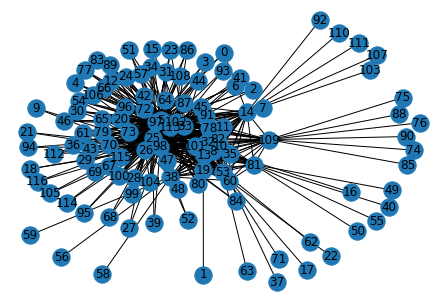

In [ ]:

# Creamos el grafo con el proceso de havel hakimi y lo graficamos 
nx.draw_spring(G, with_labels = True)

In [ ]:
EIGENVECTOR = []
DEGREE = []
BETWEENNESS = []
CLOSENESS = []
eigenvector = nx.eigenvector_centrality(G)
degree = nx.degree(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
for i in range(len(eigenvector)):
  EIGENVECTOR.append(eigenvector[i])
  DEGREE.append(degree[i])
  BETWEENNESS.append(betweenness[i])
  CLOSENESS.append(closeness[i])


Closeness_Entropy = st.entropy(CLOSENESS)
Degree_Entropy = st.entropy(DEGREE)
Eigenvector_Entropy = st.entropy(EIGENVECTOR)
Betweenness_Entropy = st.entropy(BETWEENNESS)



4.581682577808839 4.581682577808839
[0.005724001514848546, 0.019559565503900075, 0.17733574464744695, 0.15592512665697172, 0.052854937761038764, 0.005724001514848546, 0.1694188685278353, 0.00593911911308089, 0.019559565503900075, 0.019559565503900075, 0.052854937761038764, 0.019559565503900075, 0.019559565503900075, 0.08048399601441665, 0.019771896374558506, 0.0059486768623828795, 0.029813752879785577, 0.0059486768623828795, 0.04266294861916884, 0.22925471288327362, 0.020264175870282477, 0.08839614792170757, 0.005958265424580508, 0.005958265424580508, 0.1455808720524929, 0.07156384862085044, 0.029813752879785577, 0.14008229863952568, 0.005958265424580508, 0.018469724403069297, 0.030137234195575003, 0.14534697153506504, 0.27762656146688613, 0.08048399601441665, 0.030137234195575003, 0.04266294861916884, 0.030137234195575003, 0.07156384862085044, 0.28259460489015087, 0.006371348572478984, 0.08839614792170757, 0.006371348572478984, 0.09564232987267224, 0.006371348572478984, 0.006371348572

In [ ]:
K = G
Numswips = 300
swip = []
ENTBET = []
ENTEIG = []
for i in range(Numswips):
  swip.append(i)
  nx.double_edge_swap(G,nswap=1,max_tries=10000)



EIGENVECTOR = []
DEGREE = []
BETWEENNESS = []
CLOSENESS = []
eigenvector = nx.eigenvector_centrality(G)
degree = nx.degree(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
for i in range(len(eigenvector)):
  EIGENVECTOR.append(eigenvector[i])
  DEGREE.append(degree[i])
  BETWEENNESS.append(betweenness[i])
  CLOSENESS.append(closeness[i])


Closeness_Entropy = st.entropy(CLOSENESS)
Degree_Entropy = st.entropy(DEGREE)
Eigenvector_Entropy = st.entropy(EIGENVECTOR)
Betweenness_Entropy = st.entropy(BETWEENNESS)









  ENTBET.append(st.entropy(list(bet)))
  ENTEIG.append(st.entropy(list(eig)))


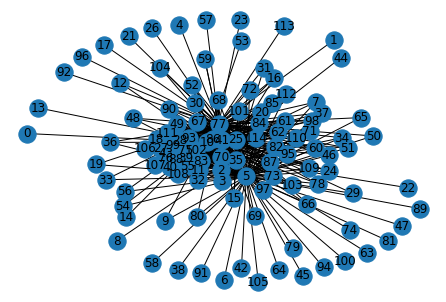

In [ ]:
nx.draw_spring(G,with_labels = True)

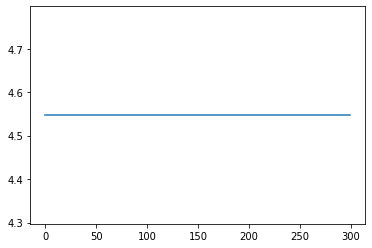

In [ ]:
plt.plot(swip,ENTBET)

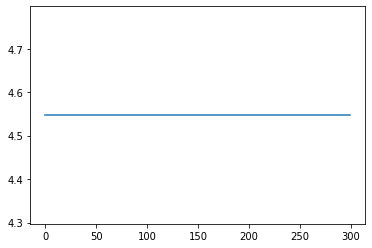

In [ ]:
plt.plot(swip,ENTEIG)

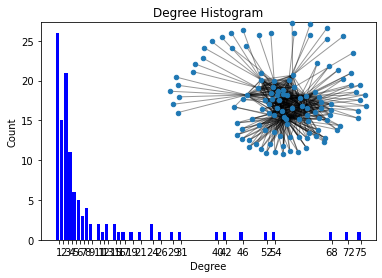

In [ ]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

In [ ]:
LOAD1 = []
load1 = nx.load_centrality(G)
for i in range(len(DegreeSec)):
  LOAD1.append(load1[i])
a = 1.1
C = []
for i in range(len(LOAD1)):
  q = (1+a)*LOAD1[i]
  C.append(q)

ATTACKS = 100
p = 1.1
DAMAGE = []
ATTACK = []
for i in range(ATTACKS):
  DELETE_NODES = []
  
  remove_node = np.random.randint(0,G.number_of_nodes())
  if (remove_node in G) == True:
    G.remove_node(remove_node)

  LOAD = []
  load = nx.load_centrality(G)
  for j in G.nodes():
    val = p*C[j]
    LOAD.append(load[j])
    if load[j] > val:
      DELETE_NODES.append(j)
    else:

      if load[j] > C[j]:
        k = st.uniform.rvs()
        P = (1/(p-1))*(load[j]/C[j] -1)
        if k <= P:
          DELETE_NODES.append(j)
  G.remove_nodes_from(DELETE_NODES)
  NodosBC = len(max(nx.connected_components(G), key=len))
  DAMAGE.append(NodosBC/m)
  ATTACK.append(i)

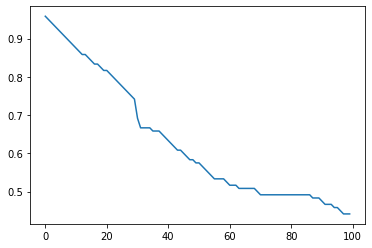

In [ ]:
plt.plot(ATTACK,DAMAGE)

In [ ]:
def remove_hubs_load(G,nodos_removidos):
  for i in range(nodos_removidos):
    keys = list(nx.load_centrality(G).keys())
    values = list(nx.load_centrality(G).values())
    maxval = max(values)
    casilla_nodo = values.index(maxval)
    G.remove_node(keys[casilla_nodo])
  return G

def remove_aleatory(G,nodos_removidos):
  for i in range(nodos_removidos):
    remove_node = np.random.randint(0,G.number_of_nodes())
    if (remove_node in G) == True:
      G.remove_node(remove_node)
  return(G)



In [ ]:
values

[0.0,
 0.331287553120343,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.007589295677325487,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02511097598428759,
 0.006017334801685056,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.22144436106941925,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1202042277962166,
 0.0376090352918485,
 0.0,
 0.0,
 0.0,
 0.03506781476040908,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.10306967782515057,
 0.0,
 0.0,
 0.13959889193936703,
 0.0,
 0.03419341659909895,
 0.0,
 0.0,
 0.0,
 0.017543859649122806,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.1751798374993516e-05,
 0.0041973965588311185,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.057003021732877336,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.017595611447497796,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

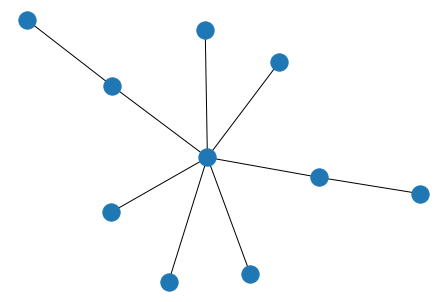

In [ ]:
G = nx.barabasi_albert_graph(10,1)
nx.draw_kamada_kawai(G)